In [2]:
import numpy as np
import pandas as pd

El objetivo es obtener, a partir de las coordenadas del elemento y de las propiedades del material, las condiciones de frontera, la ecuación __KT=F__. 

Para esto utilizaremos una estructura tipo _diccionario_ que deberá contener:

* `'n'` - Numero de los nodos globales que corresponden a los nodos del triángulo (3)
* `'x'` - Coordenadas __x__ del triángulo (3)
* `'y'` - Coordenadas __y__ el tríangulo (3)
* `'A'` - Área del tríangulo
* `'b1'` - Valor __b1__ del elemento
* `'c1'` - Valor __c1__ del elemento
* `'b2'` - Valor __b2__ del elemento
* `'c2'` - Valor __c2__ del elemento
* `'b3'` - Valor __b3__ del elemento
* `'c3'` - Valor __c3__ del elemento
* `'K'` - Matriz __K__ del elemento
* `'F'` - Vector __F__ del elemento


In [ ]:
ele = {'x':[0,1,2], 'y':[1,2,3], K = [[1,2,3],[3,4,5],[3,3,4]]}

In [3]:
value=10
dic = {'key':value, 'A':0, 'B':1}
dic

{'key': 10, 'A': 0, 'B': 1}

In [4]:
type(dic)

dict

In [7]:
dic.keys(), dic.values()

(dict_keys(['key', 'A', 'B']), dict_values([10, 0, 1]))

Así, el diccionario con las llaves necesarias sería:

In [8]:
el = {'n': None, 
      'x': None, 
      'y': None, 
      'A': None, 
      'b1': None, 
      'c1': None, 
      'b2': None, 
      'c2': None, 
      'b3': None, 
      'c3': None, 
      'K': None, 
      'F': None
     }

In [9]:
el

{'n': None,
 'x': None,
 'y': None,
 'A': None,
 'b1': None,
 'c1': None,
 'b2': None,
 'c2': None,
 'b3': None,
 'c3': None,
 'K': None,
 'F': None}

__Nota__: este paso es últil para este ejercicio, pero en realidad no es necesario declarar las llaves puesto que podemos añadirlas en cualquier momento.

Las constantes del material:

In [13]:
k = 50 # W / m°C

Para _actualizar_ un valor del diccionario utilizamos el __metodo__ `.update()`:

In [18]:
el.update({'x':[0,3,1]})
el.update({'y':[0,1,3]})
A = (1/2)*np.abs(el['x'][0]*(el['y'][1] - el['y'][2]) + 
           el['x'][1]*(el['y'][2] - el['y'][0]) +
           el['x'][2]*(el['y'][0] - el['y'][1]))
el.update(A=A)
el.update(b1 = el['y'][1] - el['y'][2])
el.update(c1 = el['x'][2] - el['x'][1])
el.update(b2 = el['y'][2] - el['y'][0])
el.update(c2 = el['x'][0] - el['x'][2])
el.update(b3 = el['y'][0] - el['y'][1])
el.update(c3 = el['x'][1] - el['x'][0])

Kb = np.array([[el['b1']*el['b1'], el['b1']*el['b2'], el['b1']*el['b3']],
               [el['b2']*el['b1'], el['b2']*el['b2'], el['b2']*el['b3']],
               [el['b3']*el['b1'], el['b3']*el['b2'], el['b3']*el['b3']] ])

Kc = np.array([[el['c1']*el['c1'], el['c1']*el['c2'], el['c1']*el['c3']],
               [el['c2']*el['c1'], el['c2']*el['c2'], el['c2']*el['c3']],
               [el['c3']*el['c1'], el['c3']*el['c2'], el['c3']*el['c3']] ])

K = (k/(4*el['A']))*(Kb + Kc)
el.update(K=K)
F = [1,2,3]
el.update(F=F)
el.update(n=3)

In [19]:
el

{'n': 3,
 'x': [0, 3, 1],
 'y': [0, 1, 3],
 'A': 4.0,
 'b1': -2,
 'c1': -2,
 'b2': 3,
 'c2': -1,
 'b3': -1,
 'c3': 3,
 'K': array([[ 25.  , -12.5 , -12.5 ],
        [-12.5 ,  31.25, -18.75],
        [-12.5 , -18.75,  31.25]]),
 'F': [1, 2, 3]}

In [22]:
def DesarrolloElementoTriangularL(x,y,n):
    '''
    param:
    x : lista de coordenadas en x
    y : lista de coordenadas en y
    n : Número de nodos
    Output:
    el: Diccionario con los parámetros 'n','x', 'y' , 'A' 'b1, 'c1' , 'b2', 'c2', 'b3', 'c3', 'K', 'F'
    '''
    el = {'x':x, 'y':y, 'n':n}
    
    A = (1/2)*np.abs(el['x'][0]*(el['y'][1] - el['y'][2]) + 
           el['x'][1]*(el['y'][2] - el['y'][0]) +
           el['x'][2]*(el['y'][0] - el['y'][1]))
    el.update(A=A)
    el.update(b1 = el['y'][1] - el['y'][2])
    el.update(c1 = el['x'][2] - el['x'][1])
    el.update(b2 = el['y'][2] - el['y'][0])
    el.update(c2 = el['x'][0] - el['x'][2])
    el.update(b3 = el['y'][0] - el['y'][1])
    el.update(c3 = el['x'][1] - el['x'][0])

    Kb = np.array([[el['b1']*el['b1'], el['b1']*el['b2'], el['b1']*el['b3']],
                   [el['b2']*el['b1'], el['b2']*el['b2'], el['b2']*el['b3']],
                   [el['b3']*el['b1'], el['b3']*el['b2'], el['b3']*el['b3']] ])

    Kc = np.array([[el['c1']*el['c1'], el['c1']*el['c2'], el['c1']*el['c3']],
                   [el['c2']*el['c1'], el['c2']*el['c2'], el['c2']*el['c3']],
                   [el['c3']*el['c1'], el['c3']*el['c2'], el['c3']*el['c3']] ])

    K = (k/(4*el['A']))*(Kb + Kc)
    el.update(K=K)
    
    return el

In [21]:
help(DesarrolloElementoTriangularL)

Help on function DesarrolloElementoTriangularL in module __main__:

DesarrolloElementoTriangularL(x, y, n)
    param:
    x : lista de coordenadas en x
    y : lista de coordenadas en y
    n : Número de nodos
    Output:
    el: Diccionario con los parámetros 'n','x', 'y' , 'A' 'b1, 'c1' , 'b2', 'c2', 'b3', 'c3', 'K', 'F'



In [26]:
el1 = DesarrolloElementoTriangularL(x=[0,3,1], y=[0,1,3], n=[1,2,3])
el1

{'x': [0, 3, 1],
 'y': [0, 1, 3],
 'n': [1, 2, 3],
 'A': 4.0,
 'b1': -2,
 'c1': -2,
 'b2': 3,
 'c2': -1,
 'b3': -1,
 'c3': 3,
 'K': array([[ 25.  , -12.5 , -12.5 ],
        [-12.5 ,  31.25, -18.75],
        [-12.5 , -18.75,  31.25]])}

In [ ]:
(1,2,3), [1,2,3]

In [29]:
def graficarElemento(el):
    import matplotlib.pyplot as plt
    if isinstance(el, dict):
        plt.figure(figsize=(5,5))
        plt.plot(el['x'] + [el['x'][0]], el['y'] + [el['y'][0]])
        for x, y, n in zip(el['x'], el['y'], el['n']):
            plt.text(x,y,n)
    
    if isinstance(el, list) or isinstance(el, tuple): 
        plt.figure(figsize=(5,5))
        for ele in el:
            plt.plot(ele['x'] + [ele['x'][0]], ele['y'] + [ele['y'][0]] )
            for x, y, n in zip(ele['x'], ele['y'], ele['n']):
                plt.text(x,y,n)
    plt.grid()
    plt.axis('equal')
    plt.show()
    

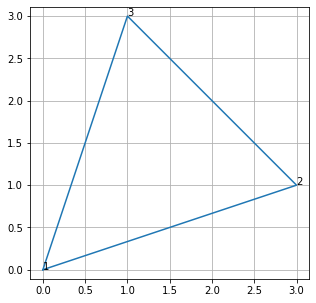

In [30]:
graficarElemento(el1)

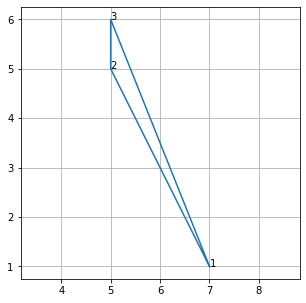

In [33]:
el2 = DesarrolloElementoTriangularL(x=[7,5,5], y=[1,5,6], n=[1,2,3])
graficarElemento(el2)

In [34]:
el2

{'x': [7, 5, 5],
 'y': [1, 5, 6],
 'n': [1, 2, 3],
 'A': 1.0,
 'b1': -1,
 'c1': 0,
 'b2': 5,
 'c2': 2,
 'b3': -4,
 'c3': -2,
 'K': array([[  12.5,  -62.5,   50. ],
        [ -62.5,  362.5, -300. ],
        [  50. , -300. ,  250. ]])}

In [ ]:
class ElementosTriangular:
    def __init__(self):
        self.el = None
    
    def DesarrolloElementoTriangularL(self, x,y,n):
        '''
        param:
        x : lista de coordenadas en x
        y : lista de coordenadas en y
        n : Número de nodos
        Output:
        el: Diccionario con los parámetros 'n','x', 'y' , 'A' 'b1, 'c1' , 'b2', 'c2', 'b3', 'c3', 'K', 'F'
        '''
        el = {'x':x, 'y':y, 'n':n}

        A = (1/2)*np.abs(el['x'][0]*(el['y'][1] - el['y'][2]) + 
               el['x'][1]*(el['y'][2] - el['y'][0]) +
               el['x'][2]*(el['y'][0] - el['y'][1]))
        el.update(A=A)
        el.update(b1 = el['y'][1] - el['y'][2])
        el.update(c1 = el['x'][2] - el['x'][1])
        el.update(b2 = el['y'][2] - el['y'][0])
        el.update(c2 = el['x'][0] - el['x'][2])
        el.update(b3 = el['y'][0] - el['y'][1])
        el.update(c3 = el['x'][1] - el['x'][0])

        Kb = np.array([[el['b1']*el['b1'], el['b1']*el['b2'], el['b1']*el['b3']],
                       [el['b2']*el['b1'], el['b2']*el['b2'], el['b2']*el['b3']],
                       [el['b3']*el['b1'], el['b3']*el['b2'], el['b3']*el['b3']] ])

        Kc = np.array([[el['c1']*el['c1'], el['c1']*el['c2'], el['c1']*el['c3']],
                       [el['c2']*el['c1'], el['c2']*el['c2'], el['c2']*el['c3']],
                       [el['c3']*el['c1'], el['c3']*el['c2'], el['c3']*el['c3']] ])

        K = (k/(4*el['A']))*(Kb + Kc)
        el.update(K=K)

        return el
    
    def graficarElemento(self, el):
        import matplotlib.pyplot as plt
        if isinstance(el, dict):
            plt.figure(figsize=(5,5))
            plt.plot(el['x'] + [el['x'][0]], el['y'] + [el['y'][0]])
            for x, y, n in zip(el['x'], el['y'], el['n']):
                plt.text(x,y,n)

        if isinstance(el, list) or isinstance(el, tuple): 
            plt.figure(figsize=(5,5))
            for ele in el:
                plt.plot(ele['x'] + [ele['x'][0]], ele['y'] + [ele['y'][0]] )
                for x, y, n in zip(ele['x'], ele['y'], ele['n']):
                    plt.text(x,y,n)
        plt.grid()
        plt.axis('equal')
        plt.show()

In [ ]:
from Elementos import ElementosTriangular as elt